In [100]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokemon-images-and-types/pokemon.csv
/kaggle/input/pokemon-images-and-types/images/images/throh.png
/kaggle/input/pokemon-images-and-types/images/images/samurott.png
/kaggle/input/pokemon-images-and-types/images/images/venomoth.png
/kaggle/input/pokemon-images-and-types/images/images/latios.png
/kaggle/input/pokemon-images-and-types/images/images/shinx.png
/kaggle/input/pokemon-images-and-types/images/images/durant.png
/kaggle/input/pokemon-images-and-types/images/images/geodude.png
/kaggle/input/pokemon-images-and-types/images/images/wingull.png
/kaggle/input/pokemon-images-and-types/images/images/miltank.png
/kaggle/input/pokemon-images-and-types/images/images/castform.png
/kaggle/input/pokemon-images-and-types/images/images/squirtle.png
/kaggle/input/pokemon-images-and-types/images/images/shaymin-land.png
/kaggle/input/pokemon-images-and-types/images/images/raikou.png
/kaggle/input/pokemon-images-and-types/images/images/mawile.png
/kaggle/input/pokemon-images-and-types

In [101]:
df=pd.read_csv('/kaggle/input/pokemon-images-and-types/pokemon.csv')

In [102]:
df.head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


In [103]:
all_types = set(df['Type1'].unique()).union(set(df['Type2'].unique()))

# Create a class for each type
class_types = {}
for i, type_name in enumerate(all_types):
    class_types[type_name] = i

# Replace the type of each Pokemon with 1 (if it matches the class) or 0 (if it doesn't match the class)
for i, row in df.iterrows():
    type1 = row['Type1']
    type2 = row['Type2']
    for type_name in all_types:
        if type_name == type1 or type_name == type2:
            df.at[i, type_name] = 1
        else:
            df.at[i, type_name] = 0

# Drop the original 'type1' and 'type2' columns
df = df.drop(columns=['Type1', 'Type2'])

# Save the modified dataset
df.head()

,Name,Ghost,Electric,Grass,Fire,Dark,Steel,Fighting,NaN,Normal,Psychic,Rock,Ground,Water,Ice,Flying,Fairy,Poison,Bug,Dragon
0,bulbasaur,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,ivysaur,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,venusaur,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,charmander,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,charmeleon,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
df.shape

(809, 20)

In [105]:
df.columns

Index([    'Name',    'Ghost', 'Electric',    'Grass',     'Fire',     'Dark',
          'Steel', 'Fighting',        nan,   'Normal',  'Psychic',     'Rock',
         'Ground',    'Water',      'Ice',   'Flying',    'Fairy',   'Poison',
            'Bug',   'Dragon'],
      dtype='object')

In [106]:
df = df.loc[:, df.columns.notna()]
# df = df.drop(df.columns[[4]], axis = 1)

In [107]:
df.head()

,Name,Ghost,Electric,Grass,Fire,Dark,Steel,Fighting,Normal,Psychic,Rock,Ground,Water,Ice,Flying,Fairy,Poison,Bug,Dragon
0,bulbasaur,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,ivysaur,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,venusaur,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,charmander,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,charmeleon,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
import keras
from keras.models import Sequential
from keras.utils import load_img, img_to_array
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [109]:
train_image = []
for i in tqdm(range(df.shape[0])):
    file_path = '/kaggle/input/pokemon-images-and-types/images/images/'+df['Name'][i]+'.png'
    if(os.path.exists(file_path)):
        img = load_img('/kaggle/input/pokemon-images-and-types/images/images/'+df['Name'][i]+'.png')
        img = img_to_array(img)
        img = img/255
        train_image.append(img)
X = np.array(train_image)

  0%|          | 0/809 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|██████████| 809/809 [00:01<00:00, 792.68it/s]


In [110]:
X.shape

(721, 120, 120, 3)

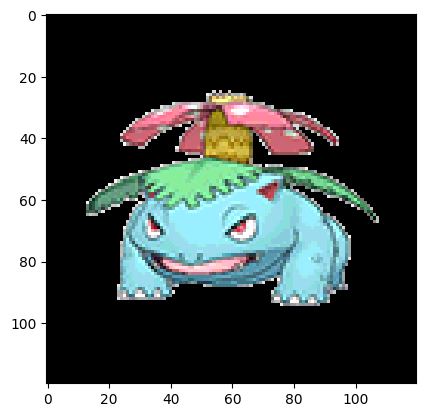

In [111]:
plt.imshow(X[2])

In [112]:
y = df.drop(['Name'], axis=1)
y = np.array(y.iloc[:721])
y.shape

(721, 18)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [114]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(120,120,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(18, activation='softmax'))

In [115]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 116, 116, 16)      1216      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 58, 58, 16)       0         
 g2D)                                                            
                                                                 
 dropout_44 (Dropout)        (None, 58, 58, 16)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 54, 54, 32)        12832     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 27, 27, 32)       0         
 g2D)                                                            
                                                                 
 dropout_45 (Dropout)        (None, 27, 27, 32)       

In [116]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [117]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/10


2023-05-23 00:34:24.120576: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_5/dropout_44/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


11/11 [==============================] - 5s 58ms/step - loss: 4.3611 - accuracy: 0.0448 - val_loss: 4.1919 - val_accuracy: 0.1644
Epoch 2/10
11/11 [==============================] - 0s 30ms/step - loss: 4.3041 - accuracy: 0.0586 - val_loss: 4.1865 - val_accuracy: 0.1233
Epoch 3/10
11/11 [==============================] - 0s 30ms/step - loss: 4.3052 - accuracy: 0.0509 - val_loss: 4.1784 - val_accuracy: 0.1096
Epoch 4/10
11/11 [==============================] - 0s 29ms/step - loss: 4.3648 - accuracy: 0.0710 - val_loss: 4.1545 - val_accuracy: 0.1507
Epoch 5/10
11/11 [==============================] - 0s 29ms/step - loss: 4.4119 - accuracy: 0.0664 - val_loss: 4.1482 - val_accuracy: 0.1507
Epoch 6/10
11/11 [==============================] - 0s 29ms/step - loss: 4.2704 - accuracy: 0.1065 - val_loss: 4.1484 - val_accuracy: 0.1507
Epoch 7/10
11/11 [==============================] - 0s 29ms/step - loss: 4.4668 - accuracy: 0.0926 - val_loss: 4.1225 - val_accuracy: 0.1507
Epoch 8/10
11/11 [======

1/1 [==============================] - 0s 21ms/step
[[0.03278515 0.03427834 0.10280446 0.04446929 0.03493828 0.02302586
  0.01251479 0.09421453 0.06555329 0.07464552 0.0346383  0.12631863
  0.01872412 0.10594123 0.02677937 0.08228016 0.04013751 0.04595117]]
Water (0.126)
Flying (0.106)
Grass (0.103)


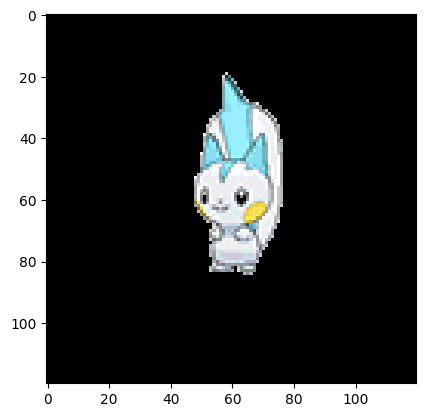

In [123]:
img = load_img('/kaggle/input/pokemon-images-and-types/images/images/pachirisu.png',target_size=(120,120,3))
img = img_to_array(img)
img = img/255

classes = np.array(df.columns[1:])
proba = model.predict(img.reshape(1,120,120,3))
print(proba)
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [119]:
print(model.predict(img.reshape(1,120,120,3)))

1/1 [==============================] - 0s 20ms/step
[[0.03278515 0.03427834 0.10280446 0.04446929 0.03493828 0.02302586
  0.01251479 0.09421453 0.06555329 0.07464552 0.0346383  0.12631863
  0.01872412 0.10594123 0.02677937 0.08228016 0.04013751 0.04595117]]


In [120]:
model.save('Label.h5')